#1)Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

#The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
#The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.


##Attribute Information:

###The explanations of sensor measurements and their brief statistics are given below.

###Variable (Abbr.) Unit Min Max Mean
###Ambient temperature (AT) C â€“6.23 37.10 17.71
###Ambient pressure (AP) mbar 985.85 1036.56 1013.07
###Ambient humidity (AH) (%) 24.08 100.20 77.87
###Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
###Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
###Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
###Turbine after temperature (TAT) C 511.04 550.61 546.16
###Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
###Turbine energy yield (TEY) MWH 100.02 179.50 133.51
###Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
###Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29


In [ ]:
pip install ipython==7.10.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
!pip install keras --upgrade

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.14.0 which is incompatible.


In [ ]:
!pip3 install tensorflow

  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
pip install tensorflow scikeras scikit-learn

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier, KerasRegressor
#from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import dataset

from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
gas = pd.read_csv("gas_turbines.csv")
gas

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

EDA & Data preprocessing

In [ ]:
gas.isnull().count()

AT      15039
AP      15039
AH      15039
AFDP    15039
GTEP    15039
TIT     15039
TAT     15039
TEY     15039
CDP     15039
CO      15039
NOX     15039
dtype: int64

In [ ]:
gas.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [ ]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
#Descriptive Analysis

In [ ]:
gas.shape

(15039, 11)

In [ ]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [ ]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gas.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [ ]:
gas.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [ ]:
gas.corr()["TEY"].sort_values(ascending=False)


TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [ ]:
# Checking correlation between variables
gas.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

In [ ]:
numerical_features = gas.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

<Axes: >

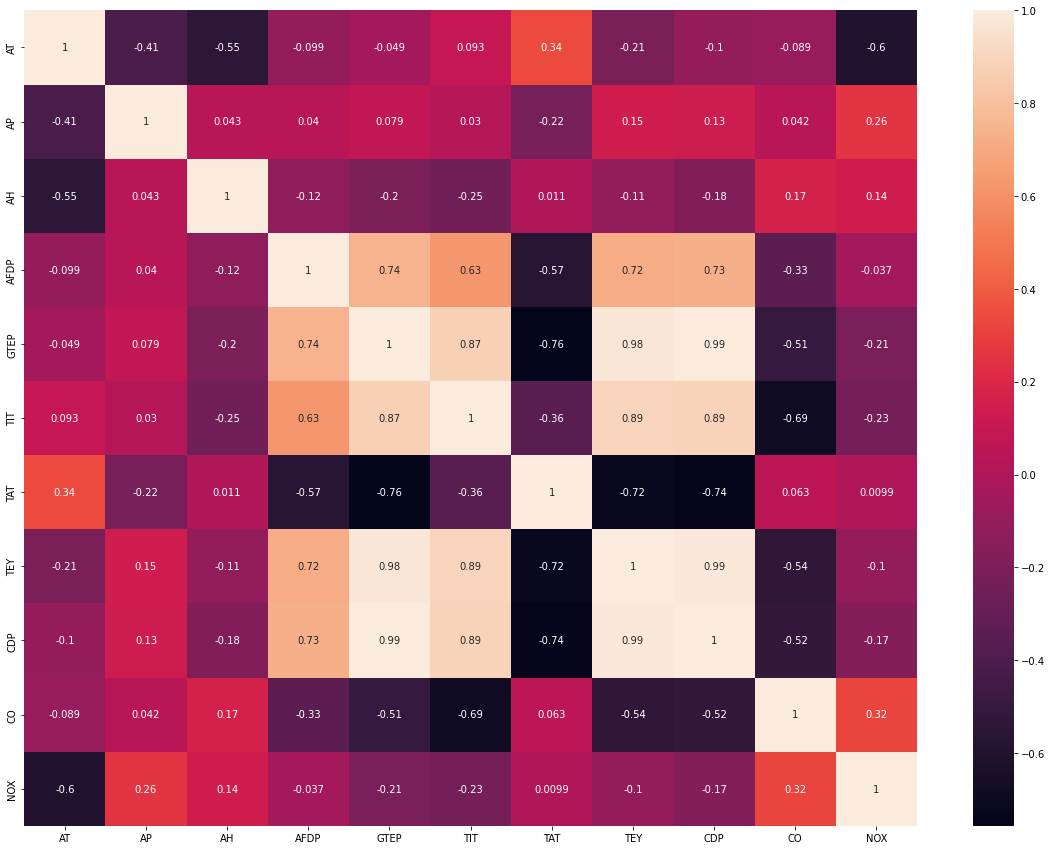

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(gas.corr(),annot=True)

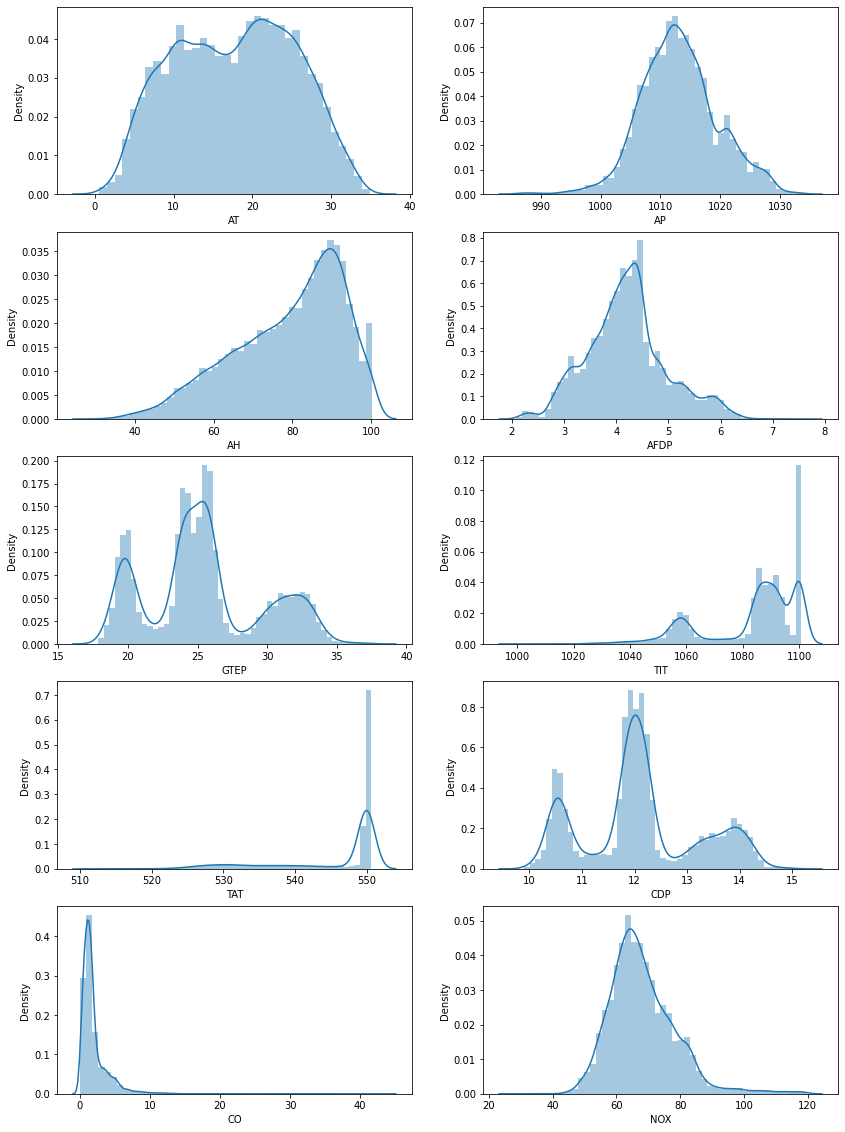

In [ ]:
#Data Visualization
#Univariate plots

fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.distplot(gas.AT, ax = ax[0,0])
sns.distplot(gas.AP, ax = ax[0,1])
sns.distplot(gas.AH, ax = ax[1,0])
sns.distplot(gas.AFDP, ax = ax[1,1])
sns.distplot(gas.GTEP, ax = ax[2,0])
sns.distplot(gas.TIT, ax = ax[2,1])
sns.distplot(gas.TAT, ax = ax[3,0])
sns.distplot(gas.CDP, ax = ax[3,1])
sns.distplot(gas.CO, ax = ax[4,0])
sns.distplot(gas.NOX, ax = ax[4,1])

plt.show()

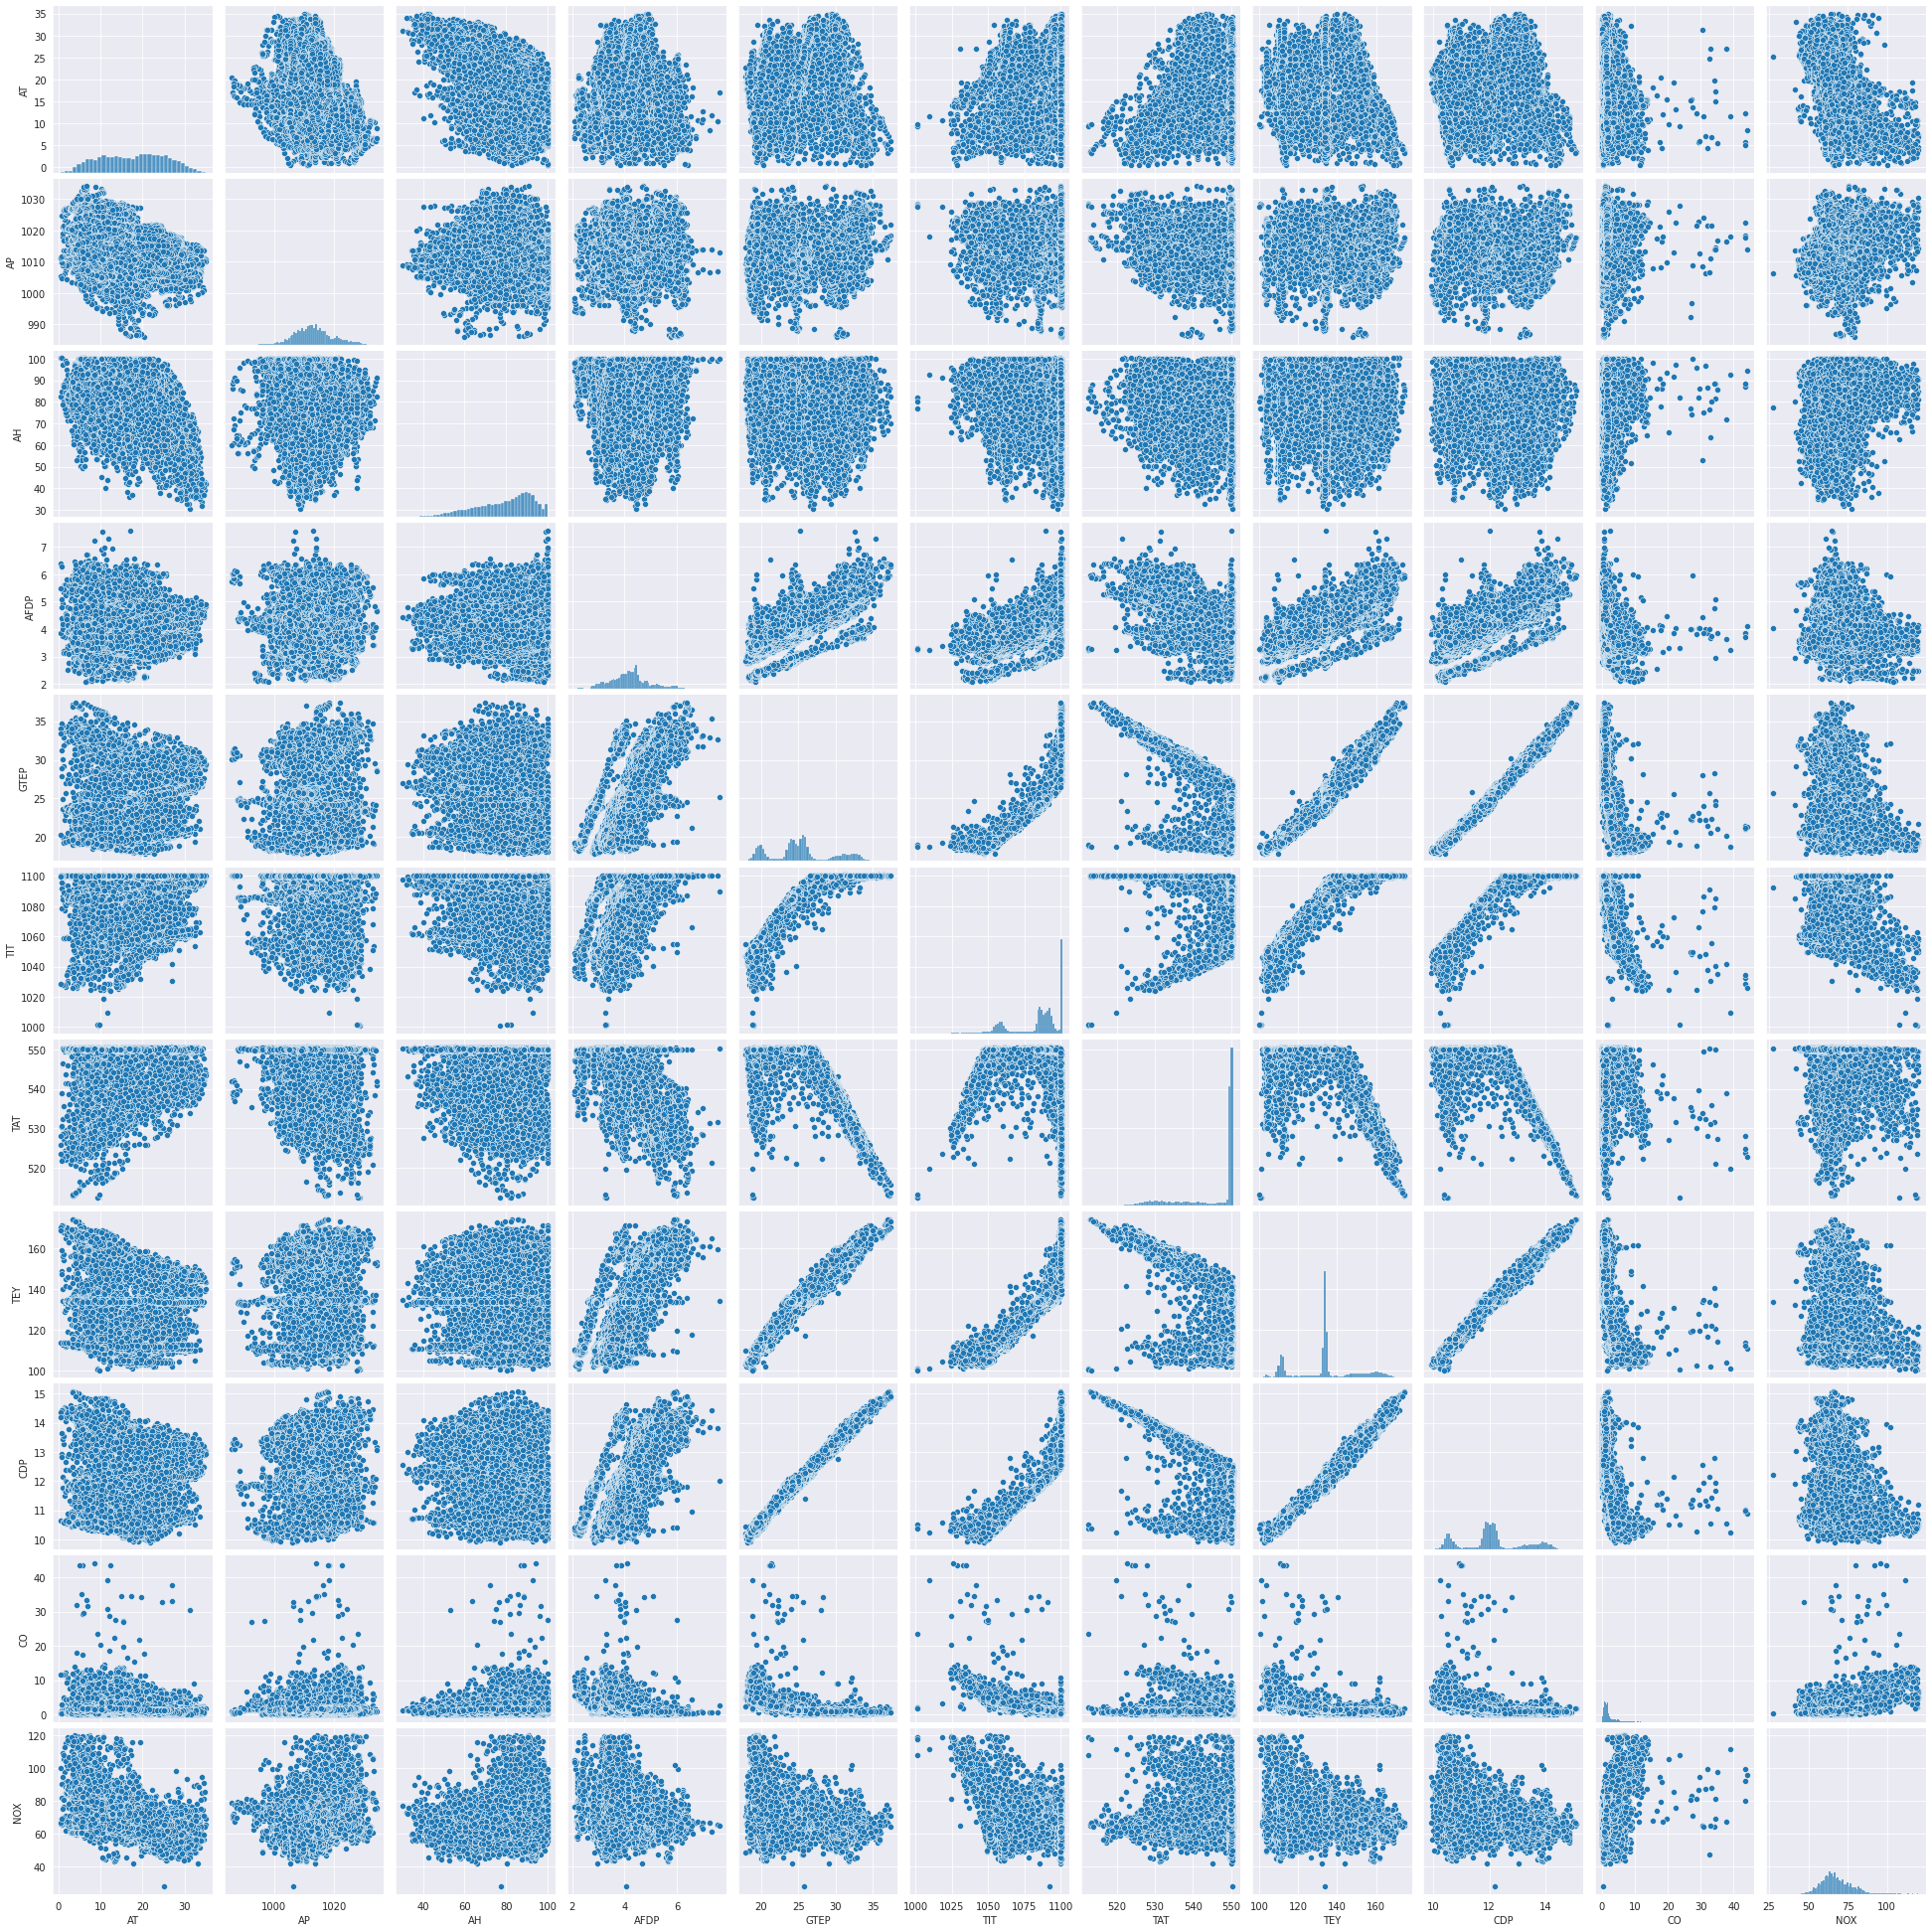

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(gas)


Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

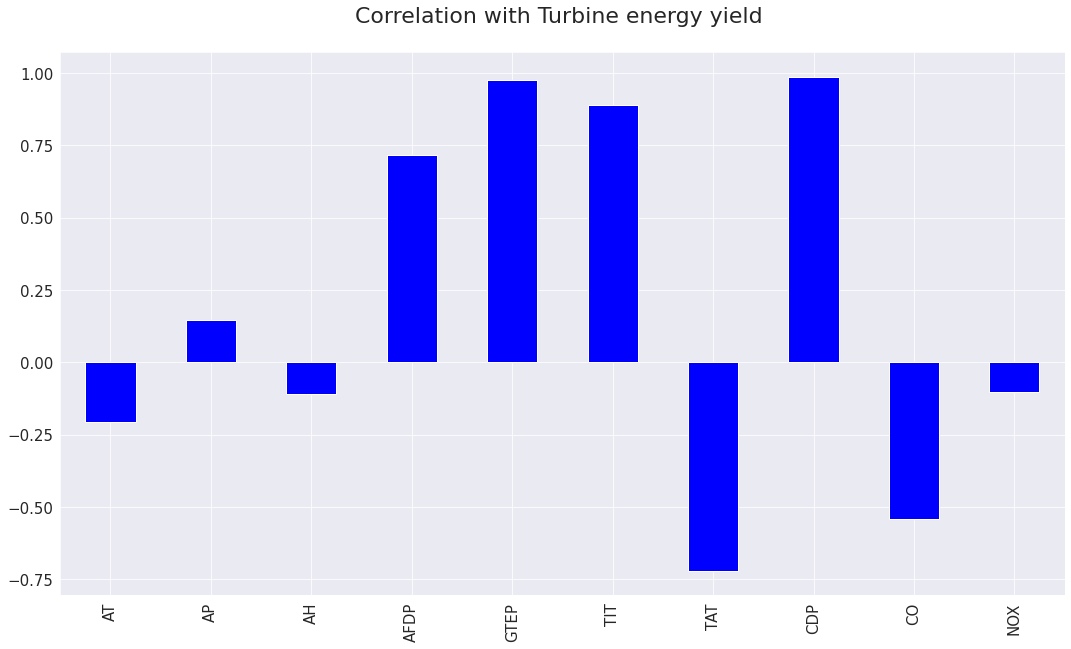

In [ ]:
# correlation with TEY

gas1 = gas.copy()

correlations = gas1.corrwith(gas["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'b',
        rot = 90, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

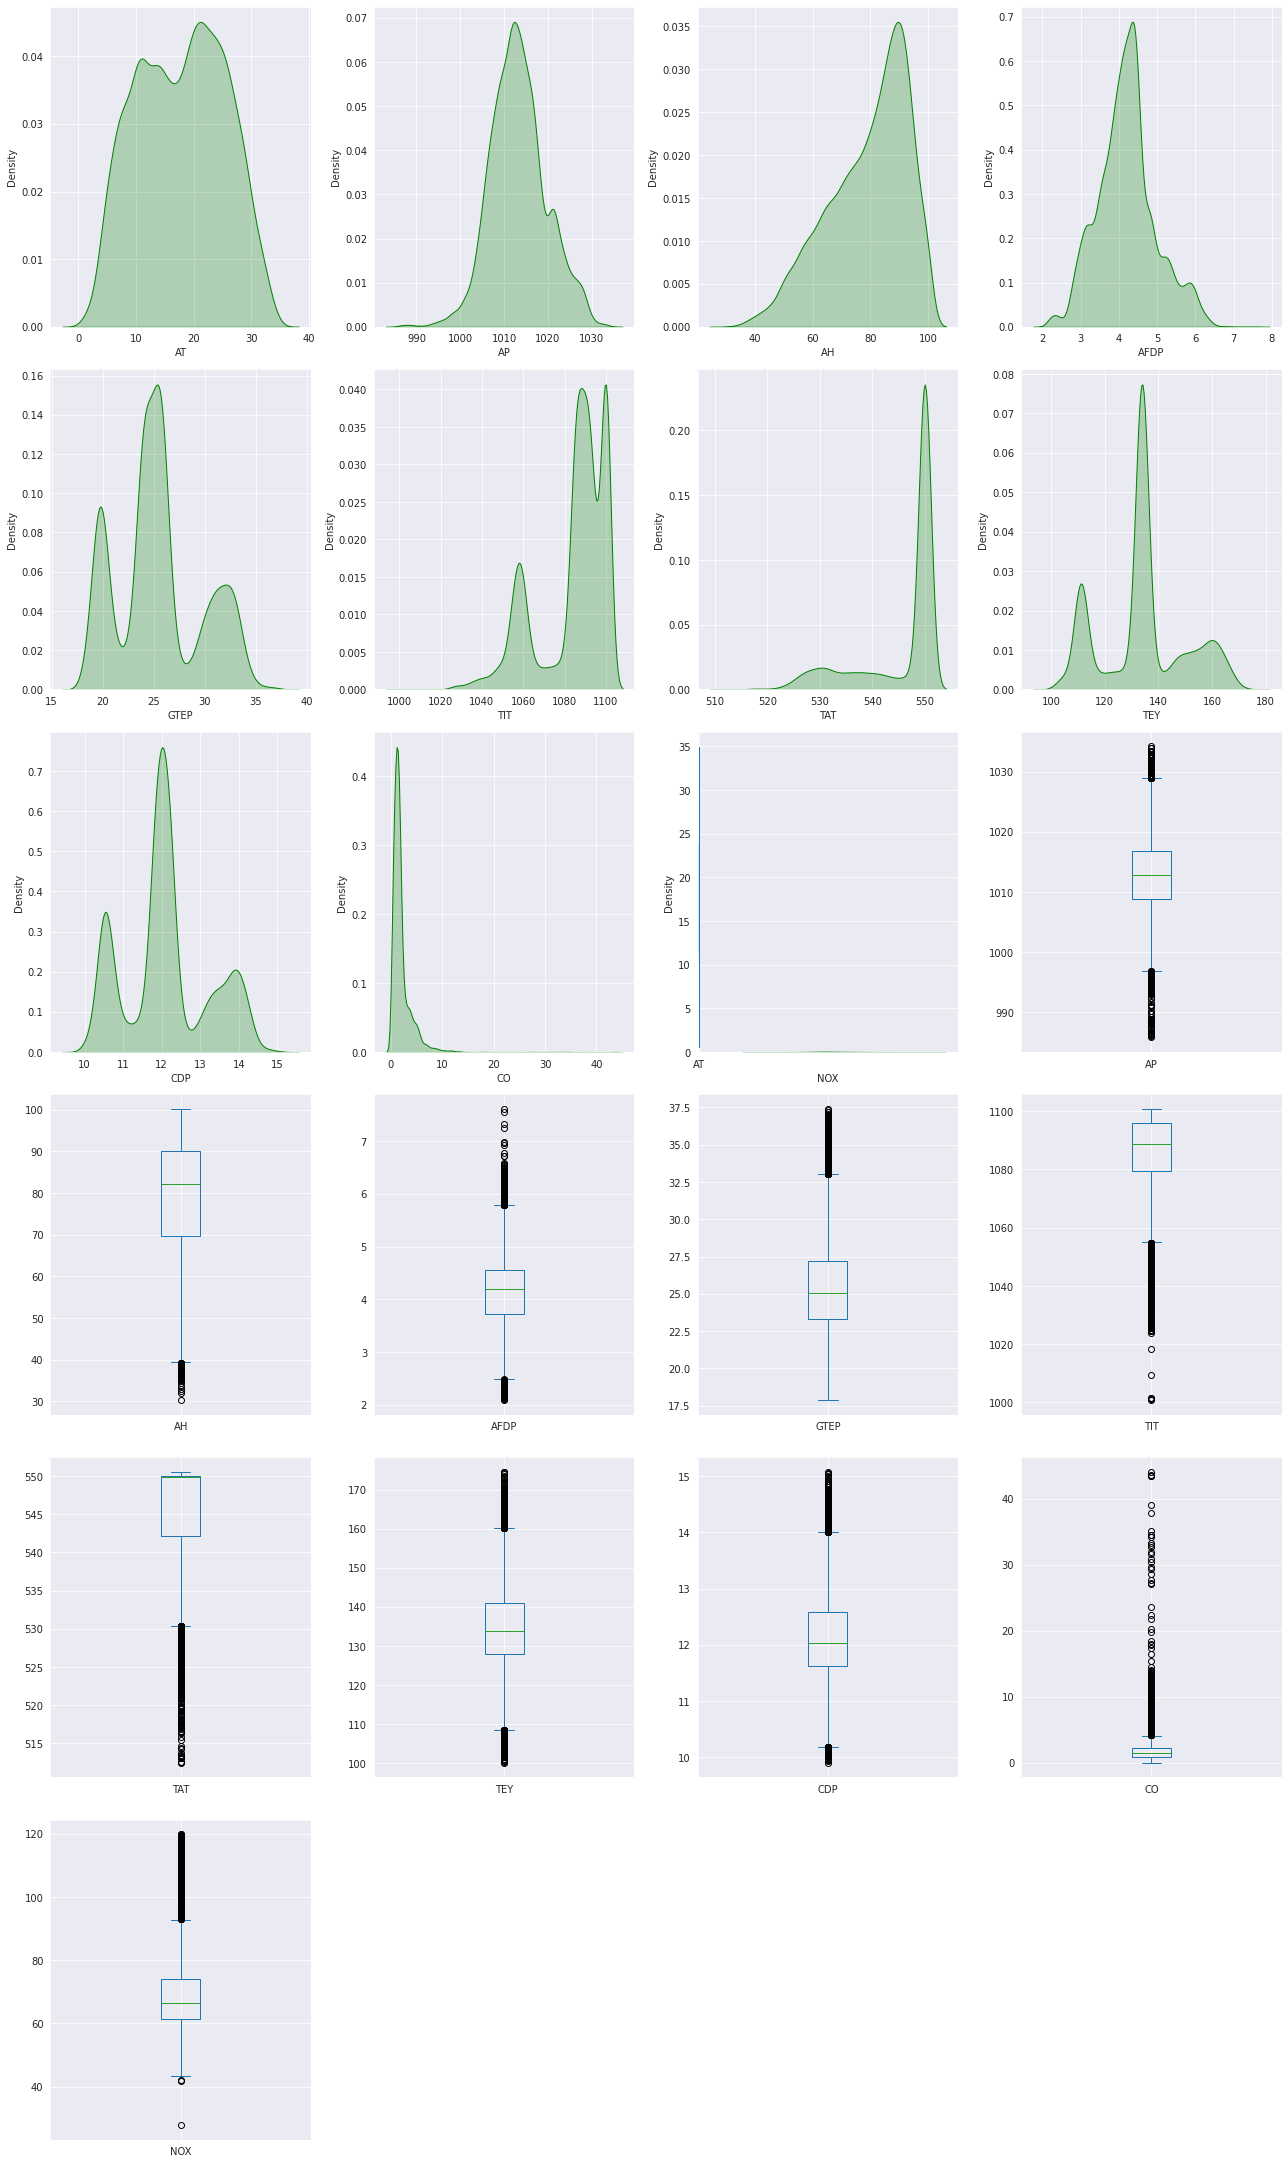

AT        AP        AH      AFDP      GTEP       TIT  \
skewness -0.030710  0.107601 -0.681224  0.315150  0.370987 -1.133744   
kurtosis -0.987597  0.424070 -0.282476  0.281642 -0.618358  0.375232   

               TAT       TEY       CDP         CO       NOX  
skewness -1.485524  0.145963  0.263042   6.534577  1.126605  
kurtosis  0.847637 -0.487058 -0.589420  82.518116  2.660381

In [ ]:
num_columns = gas.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gas[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    gas[col].plot.box()
plt.tight_layout()
plt.show()
num_data = gas[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

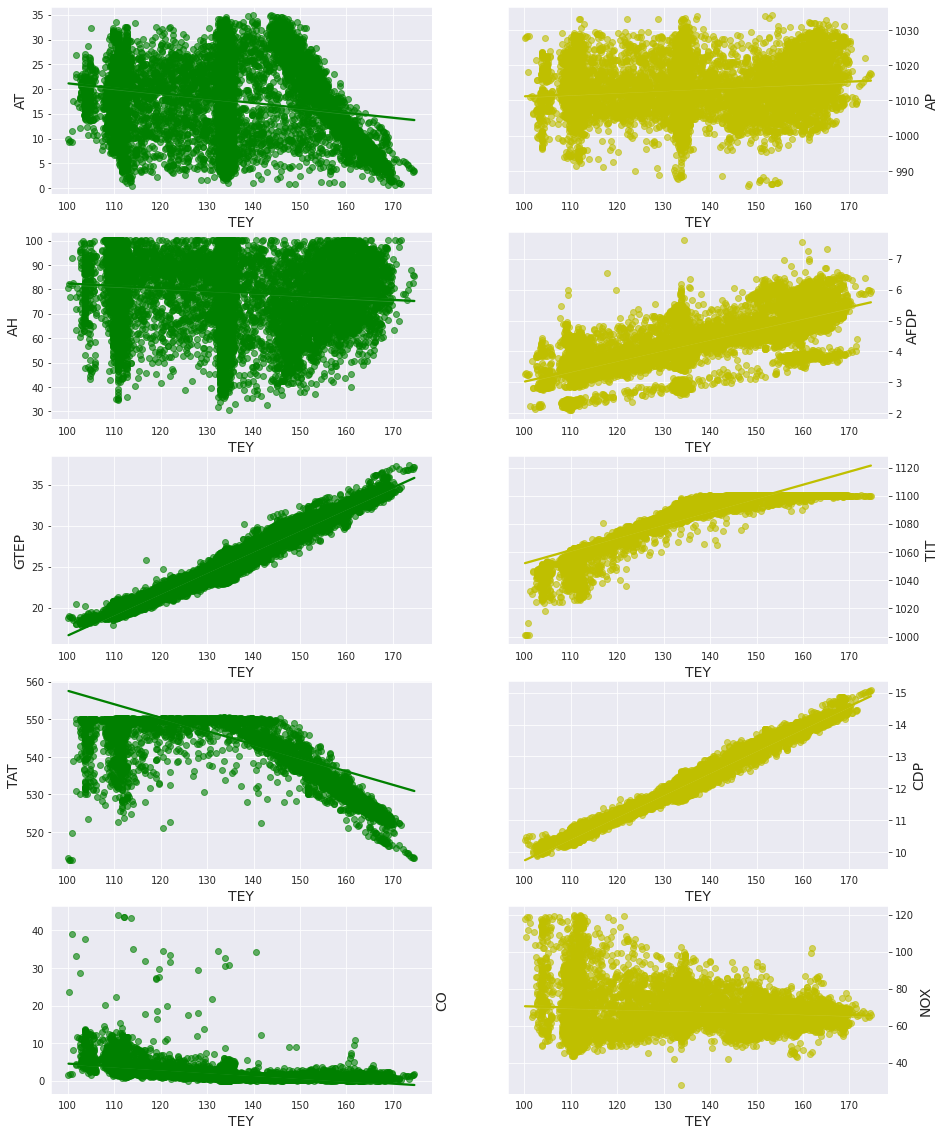

In [ ]:
# plot regplots  for Age, KM, HP, CC, Doors, Gears, Quarterly_Tax and Weight against TEY
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = gas, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = gas, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = gas, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = gas, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'GTEP', data = gas, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = gas, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'TAT', data = gas, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = gas, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'CO', data = gas, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")


sns.regplot(x = 'TEY', y = 'NOX', data = gas, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()


In [ ]:
#Outliers Detection
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    for col in df.columns.tolist():         # iterate over features(columns)
        Q1 = np.percentile(df[col],25)      # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR            # outlier step

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(gas[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


In [ ]:
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

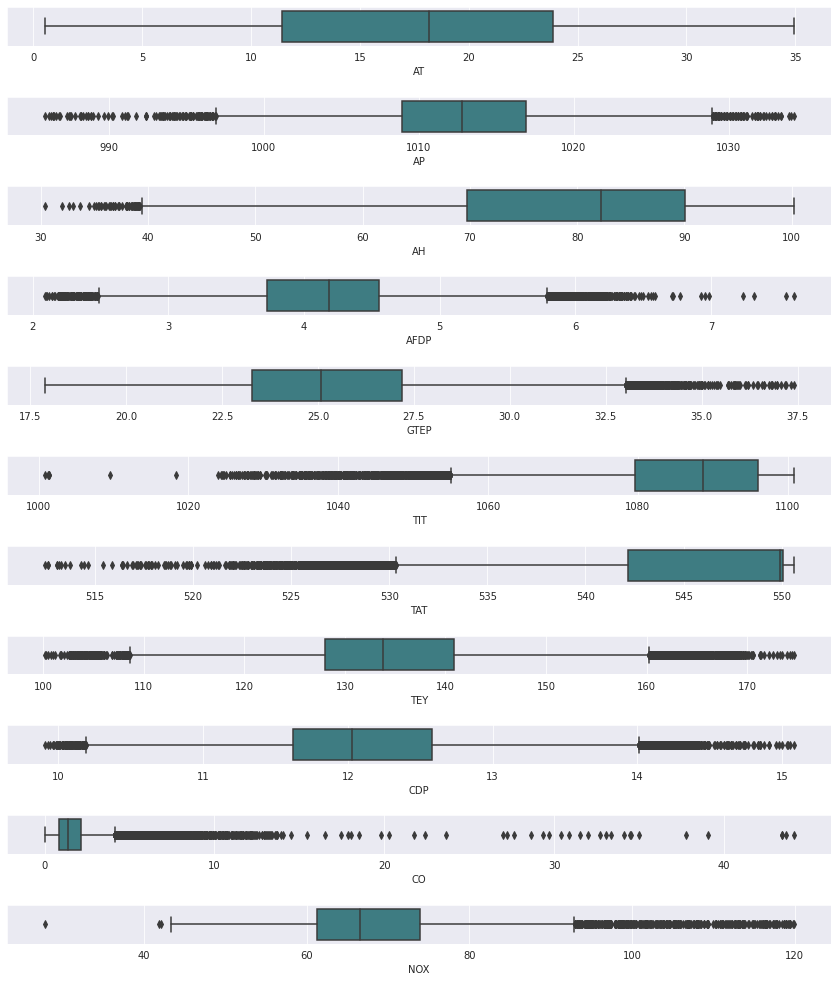

In [ ]:
outlier = gas.copy()
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

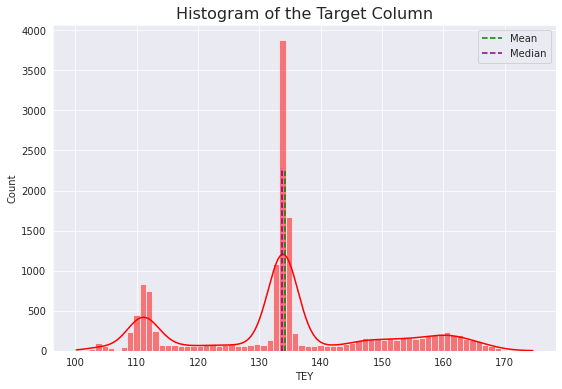

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.histplot(data= gas, x= "TEY", color= "red", kde= True)
plt.axvline(x=gas["TEY"].mean(), ymax= 0.55, color= "green", linestyle= '--', label= "Mean")
plt.axvline(x=gas["TEY"].median(), ymax= 0.56, color= "purple", linestyle= '--',label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();


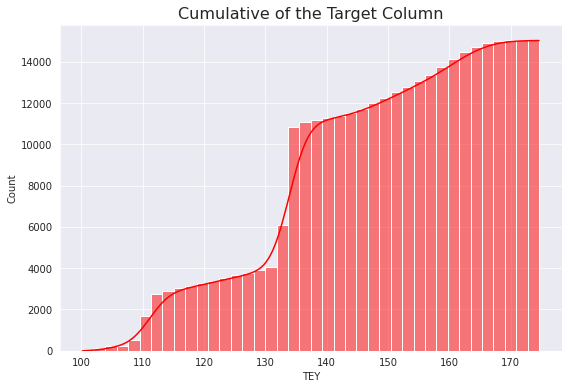

In [ ]:
plt.figure(figsize = (9,6))
sns.histplot(gas["TEY"], kde= True, bins= 40, color= "red", cumulative= True)
plt.title("Cumulative of the Target Column", fontsize=16);

 Mostly none of the features are on the same scale as we already saw in the previous section.

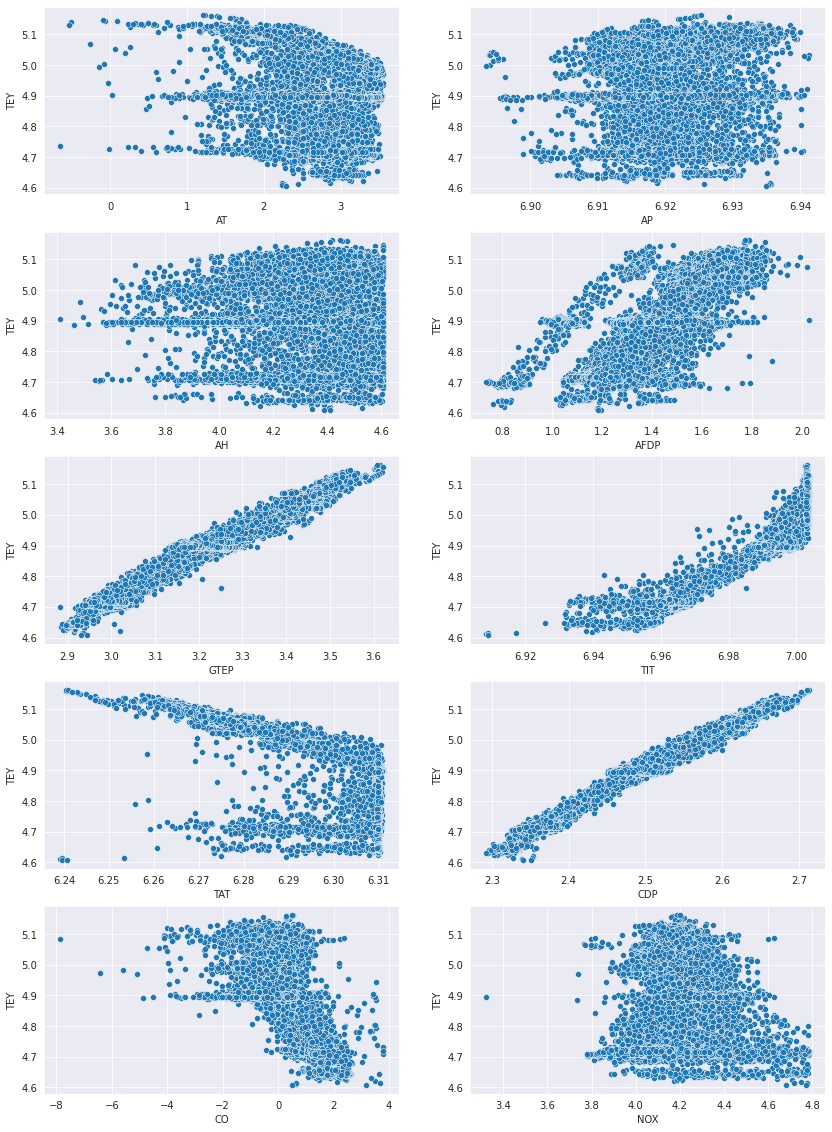

In [ ]:
#Multivariate Analysis
fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.scatterplot(x=np.log(gas['AT']), y=np.log(gas['TEY']),ax= ax[0,0])
sns.scatterplot(x=np.log(gas['AP']), y=np.log(gas['TEY']), ax= ax[0,1])
sns.scatterplot(x=np.log(gas['AH']), y =np.log(gas['TEY']), ax= ax[1,0])
sns.scatterplot(x=np.log(gas['AFDP']), y =np.log(gas['TEY']),ax= ax[1,1])
sns.scatterplot(x=np.log(gas['GTEP']), y=np.log(gas['TEY']), ax= ax[2,0])
sns.scatterplot(x=np.log(gas['TIT']), y=np.log(gas['TEY']), ax= ax[2,1])
sns.scatterplot(x=np.log(gas['TAT']), y=np.log(gas['TEY']), ax= ax[3,0])
sns.scatterplot(x=np.log(gas['CDP']), y=np.log(gas['TEY']), ax= ax[3,1])
sns.scatterplot(x=np.log(gas['CO']), y=np.log(gas['TEY']), ax= ax[4,0])
sns.scatterplot(x=np.log(gas['NOX']), y=np.log(gas['TEY']), ax= ax[4,1])

plt.show()

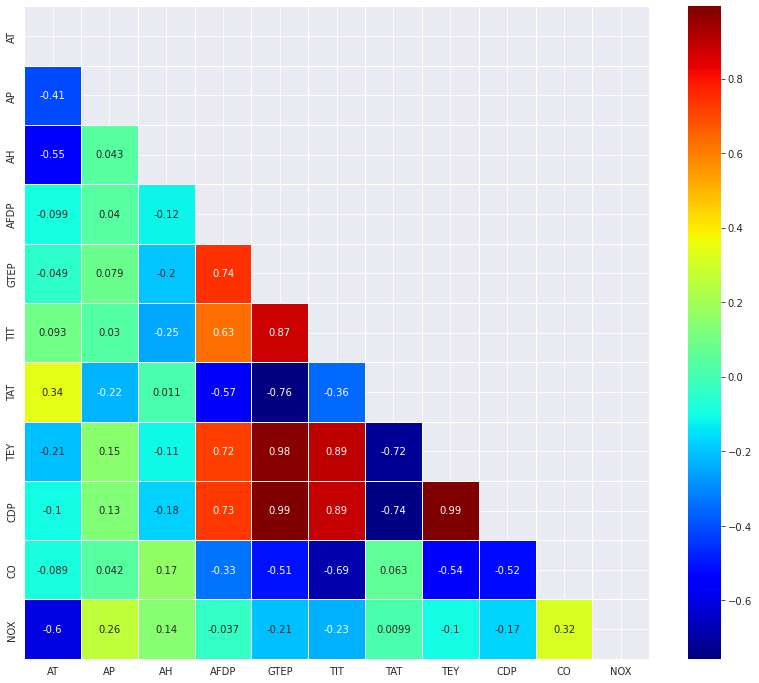

In [ ]:
#Correlation Matrix

plt.figure(figsize=(14,12))
mask = np.zeros_like(gas.corr(), dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data= gas.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white', mask=mask);

In [ ]:
#Data Pre-Processing
#Feature Selection Technique

from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [ ]:
x = gas.drop('TEY', axis=1)
y = gas[["TEY"]]

In [ ]:
#Feature Extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [ ]:
#Summarize Scores
scores = fit.scores_
features = fit.transform(x)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score Feature
7  1.712757     CDP
4  1.601104    GTEP
5  1.322841     TIT
6  0.894685     TAT
3  0.660633    AFDP
8  0.512037      CO
0  0.412957      AT
9  0.300502     NOX
1  0.138742      AP
2  0.097417      AH

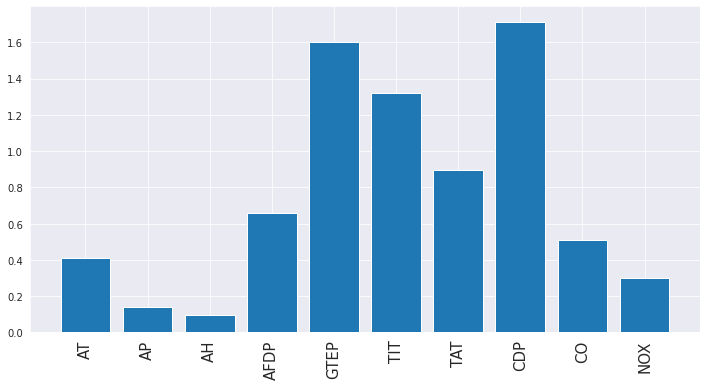

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

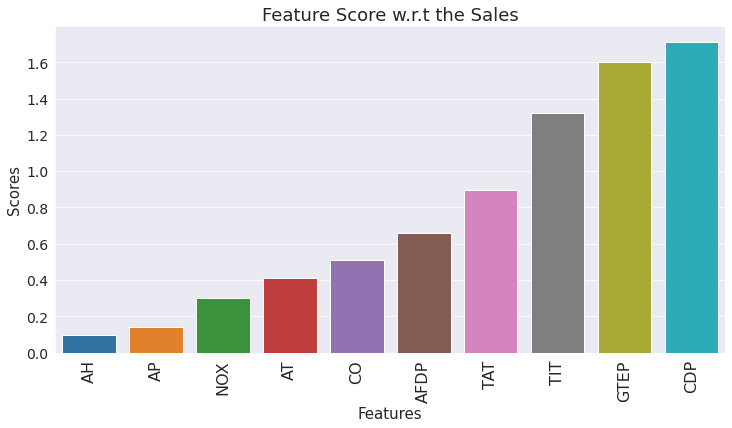

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
score_df.sort_values('Score', ascending=False)

Score Feature
7  1.712757     CDP
4  1.601104    GTEP
5  1.322841     TIT
6  0.894685     TAT
3  0.660633    AFDP
8  0.512037      CO
0  0.412957      AT
9  0.300502     NOX
1  0.138742      AP
2  0.097417      AH

In [ ]:
model_data = gas[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

Feature Engineering

Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores


In [ ]:
#Applying Standard Scaler

continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [ ]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

In [ ]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64


In [ ]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std(),1))

Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64


In [ ]:
# Test Train Split With Imbalanced Dataset

x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

Hyperparameter Tuning

In [ ]:
#Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons


def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units = hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:
tuner = RandomSearch(build_model, objective= 'val_mean_absolute_error', max_trials= 5,
                     executions_per_trial= 3, directory= 'project', project_name= 'Gas Turbine')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

In [ ]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 16
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 96
units_4: 96
units_5: 64
units_6: 96
units_7: 64
units_8: 96
units_9: 96
units_10: 64
units_11: 32
units_12: 64
units_13: 64
units_14: 32
units_15: 96
Score: 0.024220272277792294

Trial 0 summary
Hyperparameters:
num_layers: 16
units_0: 96
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.024232001354297

Trial 3 summary
Hyperparameters:
num_layers: 13
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 96
units_3: 64
units_4: 96
units_5: 32
units_6: 96
units_7: 96
units_8: 32
units_9: 64
units_10: 32
units_11: 64
units_12: 64
units_13: 96
units_14: 32
units_15: 96
Score: 0.0242

In [ ]:
#Hyperparameter Tuning: Optimal Batch_size, Number of Epochs


def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model1

In [ ]:
model1     = KerasRegressor(build_fn=create_model,verbose=0)
batch_size = [20,40,50]
epochs     = [50,100,200]
param_grid = dict(batch_size= batch_size, epochs= epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)

In [ ]:

grid_result1 = grid.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=20, epochs=50....................................
[CV 1/5; 1/9] END .....batch_size=20, epochs=50;, score=0.996 total time=  45.0s
[CV 2/5; 1/9] START batch_size=20, epochs=50....................................
[CV 2/5; 1/9] END .....batch_size=20, epochs=50;, score=0.998 total time=  24.5s
[CV 3/5; 1/9] START batch_size=20, epochs=50....................................
[CV 3/5; 1/9] END .....batch_size=20, epochs=50;, score=0.998 total time=  43.0s
[CV 4/5; 1/9] START batch_size=20, epochs=50....................................
[CV 4/5; 1/9] END .....batch_size=20, epochs=50;, score=0.998 total time=  22.4s
[CV 5/5; 1/9] START batch_size=20, epochs=50....................................
[CV 5/5; 1/9] END .....batch_size=20, epochs=50;, score=0.998 total time=  22.6s
[CV 1/5; 2/9] START batch_size=20, epochs=100...................................
[CV 1/5; 2/9] END ....batch_size=20, epochs=100;,

In [ ]:
print('Best {}, using {}'.format(grid_result1.best_score_, grid_result1.best_params_))
means  = grid_result1.cv_results_["mean_test_score"]
stds   = grid_result1.cv_results_["std_test_score"]
params = grid_result1.cv_results_["params"]
for mean,stdev,param in zip(means, stds,params):
    print("{}, {} with {}".format(mean, stdev, param))

Best 0.9984977290005694, using {'batch_size': 40, 'epochs': 200}
0.9976608076022112, 0.0007348448001174727 with {'batch_size': 20, 'epochs': 50}
0.9979765777976274, 0.00032641633952294464 with {'batch_size': 20, 'epochs': 100}
0.9980267261650262, 0.0004458732095806169 with {'batch_size': 20, 'epochs': 200}
0.9978215444733006, 0.00019902025648884788 with {'batch_size': 40, 'epochs': 50}
0.9977390913924203, 0.00043710608859619357 with {'batch_size': 40, 'epochs': 100}
0.9984977290005694, 6.799314169142516e-05 with {'batch_size': 40, 'epochs': 200}
0.9980084949840231, 0.0003425767354399002 with {'batch_size': 50, 'epochs': 50}
0.9980600233101974, 0.0003037024198723352 with {'batch_size': 50, 'epochs': 100}
0.9981530261699932, 0.00032895743619418234 with {'batch_size': 50, 'epochs': 200}


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [ ]:
pip install --upgrade tensorflow

In [ ]:
# Hyperparameter Tuning: Optimal Droupout rate
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))

    adam = Adam(lr=0.001)
    model2.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model2

In [ ]:
model2       = KerasRegressor(build_fn= create_model, batch_size= 40, epochs= 200, verbose= 0)
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5]
param_grid   = dict(dropout_rate= dropout_rate)
grid2        = GridSearchCV(estimator= model2, param_grid= param_grid, cv= KFold(), verbose= 10)

In [ ]:
#grid_result2 = grid2.fit(x_test, y_test)

In [ ]:
#pip uninstall tensorflow
#pip uninstall scikit-learn
pip install tensorflow scikit-learn

In [88]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom KerasRegressor class
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, optimizer='adam', activation='relu', batch_size=32, epochs=10):
        self.optimizer = optimizer
        self.activation = activation
        self.batch_size = batch_size
        self.epochs = epochs

    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(10, input_dim=10, activation=self.activation))
        self.model.add(Dense(1, activation='linear'))
        self.model.compile(loss='mean_squared_error', optimizer=self.optimizer)
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create a GridSearchCV instance with the custom wrapper
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

keras_regressor = KerasRegressorWrapper()
grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, cv=5)

# Generate some example data (replace with your actual data)
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Fit the GridSearchCV to your data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 63ms/step
Best Parameters:  {'activation': 'tanh', 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}
Best Score:  0.8471402632721341


In [89]:
print('Best {}, using {}'.format(grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_["mean_test_score"]
stds  = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_["params"]
for mean,stdev,param in zip(means, stds, params):
    print("{}, {} with {}".format(mean, stdev, param))

Best 0.8471402632721341, using {'activation': 'tanh', 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}
-0.05787195160806702, 0.046173919578243426 with {'activation': 'relu', 'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}
nan, nan with {'activation': 'relu', 'batch_size': 16, 'epochs': 10, 'optimizer': 'sgd'}
-0.06001570712403672, 0.048771474767292974 with {'activation': 'relu', 'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}
nan, nan with {'activation': 'relu', 'batch_size': 16, 'epochs': 20, 'optimizer': 'sgd'}
-0.05514038498425733, 0.04918054991849854 with {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'optimizer': 'adam'}
nan, nan with {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'optimizer': 'sgd'}
-0.0588323344273534, 0.047602996789851616 with {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
nan, nan with {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}
-0.05490221237888324, 0.04519563267686503 wi

In [90]:
#Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam = Adam(lr=0.001)
    model3.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model3

In [91]:
model3 = KerasRegressor(build_fn=create_model, batch_size=40,epochs=200,verbose=0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)

In [94]:
#grid_result3 = grid3.fit(x_test,y_test)

In [100]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_absolute_error

# Define a function to create the Keras model with activation function
def create_model(init='normal'):
    model = Sequential()
    model.add(Dense(32, input_dim=7, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation="linear"))

    adam = Adam(lr=0.001)
    model.compile(loss='mean_absolute_error', optimizer=adam, metrics=["mean_absolute_error"])
    return model

# Generate example data (replace with your data)
X = np.random.rand(100, 7)
y = np.random.rand(100, 1)

# Define the hyperparameter combinations to try
init_values = ['normal', 'uniform', 'zero']
best_score = float('inf')
best_params = {}

# Lists to store cross-validation scores
mae_scores = []

# Loop through hyperparameter combinations
for init in init_values:
    model = create_model(init=init)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train, epochs=200, batch_size=40, verbose=0)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        scores.append(mae)

    avg_score = np.mean(scores)
    mae_scores.append(avg_score)

    if avg_score < best_score:
        best_score = avg_score
        best_params['init'] = init

# Calculate mean and standard deviation of MAE scores
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

# Print the best parameters, best score, mean, and standard deviation of MAE scores
print("Best Parameters: ", best_params)
print("Best Score (MAE): ", best_score)
print("Mean MAE: ", mean_mae)
print("Standard Deviation MAE: ", std_mae)


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step
Best Parameters:  {'init': 'normal'}
Best Score (MAE):  0.23078162228822513
Mean MAE:  0.24923449792227206
Standard Deviation MAE:  0.01877971678549285


Model Building Neural Networks
Standardizing only predictor variable - after train test split

In [101]:
X = gas.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = gas.iloc[:,0]

In [ ]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

In [102]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model2 = Sequential()
model2.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model2.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model2.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [103]:
# Compile model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])


In [105]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate example data with matching dimensions
x_train = np.random.rand(10527, 10)  # Replace with your actual input data
y_train = np.random.rand(10527, 1)   # Replace with your actual target data

# Define your Keras model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile your model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model with matching input and target dimensions
model.fit(x_train, y_train, epochs=100, batch_size=40)

# Perform training and evaluation as needed


Epoch 1/100
264/264 [==============================] - 2s 3ms/step - loss: 0.1064
Epoch 2/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0862
Epoch 3/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0857
Epoch 4/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0849
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0848
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0845
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0846
Epoch 8/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0846
Epoch 9/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0843
Epoch 10/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0843
Epoch 11/100
264/264 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 12/100
264/264 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 13/100


In [109]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test)   # scaling test data -- predictor

print("x_train_scaled :", x_train_scaled.shape)
print("x_test_scaled  :",x_test_scaled.shape)
print("y_train        :",y_train.shape)
print("y_test         :",y_test.shape)

x_train_scaled : (12031, 7)
x_test_scaled  : (3008, 7)
y_train        : (12031, 1)
y_test         : (3008, 1)


In [110]:
model = Sequential()
model.add( Dense(units= 50, activation= 'relu', kernel_initializer= 'normal', input_dim= 7)) # input layer
model.add( Dense(units= 20, activation= 'tanh', kernel_initializer= 'normal')) # hidden layer
model.add( Dense(units= 1, kernel_initializer= 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss= "mse", metrics= ["mae", "mse"])
history = model.fit(x_train_scaled, y_train, batch_size= 50, validation_split= 0.3, epochs=10,  verbose=1)


Epoch 1/10
169/169 [==============================] - 2s 7ms/step - loss: 17586.2168 - mae: 131.6480 - mse: 17586.2148 - val_loss: 16728.3008 - val_mae: 128.3754 - val_mse: 16728.3008
Epoch 2/10
169/169 [==============================] - 1s 6ms/step - loss: 16234.3135 - mae: 126.4144 - mse: 16234.3135 - val_loss: 15679.6445 - val_mae: 124.2240 - val_mse: 15679.6445
Epoch 3/10
169/169 [==============================] - 1s 6ms/step - loss: 15262.7305 - mae: 122.5130 - mse: 15262.7305 - val_loss: 14764.4209 - val_mae: 120.4842 - val_mse: 14764.4209
Epoch 4/10
169/169 [==============================] - 1s 6ms/step - loss: 14380.7861 - mae: 118.8611 - mse: 14380.7861 - val_loss: 13914.2480 - val_mae: 116.9028 - val_mse: 13914.2480
Epoch 5/10
169/169 [==============================] - 1s 3ms/step - loss: 13554.0859 - mae: 115.3319 - mse: 13554.0859 - val_loss: 13112.0186 - val_mae: 113.4198 - val_mse: 13112.0186
Epoch 6/10
169/169 [==============================] - 1s 3ms/step - loss: 12771.

In [111]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    # Defining list of hyperparameters
    batch_size_list = [10 , 15 , 20 ]
    epoch_list      = [10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]], columns=['batchsize','epochs','Accuracy'] ))

            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:', epochs_trial, 'Accuracy:', 100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)

94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.29785
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.582891
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.635484
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 10 Accuracy: TEY    89.813909
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 50 Accuracy: TEY    99.540143
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 100 Accuracy: TEY    99.582537
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 10 Accuracy: TEY    81.085196
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 50 Accuracy: TEY    99.601749
dtype: float64
94/94 [========

In [112]:
#Training Model - using best params
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train_scaled,y_train, batch_size= 20, epochs= 10, verbose= 0)


Model Evaluation Train and Test Error

Predicting values from Model using same dataset

In [113]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


CDP    GTEP     TIT     TAT    AFDP        CO       AT  Actual  \
13312  12.219  25.762  1092.5  550.25  4.0023   1.26430  24.0930  134.46   
12627  10.791  20.085  1059.6  549.94  3.2106   2.69370  20.4500  111.88   
6393   12.126  25.221  1089.9  549.62  4.5325   1.96250  20.2620  133.72   
4990   12.218  25.965  1092.9  549.96  4.4266   1.57120  26.8620  133.79   
12462  10.466  19.688  1056.9  550.01  3.1241   2.29960  19.4090  110.77   
7405   10.624  19.387  1058.9  550.17  3.3709   4.27640   2.2158  113.32   
10993  12.088  25.392  1089.7  550.11  3.7871   0.83578  23.8520  133.77   
9488   11.498  23.225  1079.4  549.60  4.2837   2.01980  12.3950  128.98   
14201  13.971  32.518  1100.1  528.98  5.1559   0.87760  12.3590  159.42   
9757   13.862  32.105  1100.0  530.69  5.9309  10.75000   8.6376  161.86   

        Predicted  
13312  127.270432  
12627  127.270432  
6393   127.270432  
4990   127.270432  
12462  127.270432  
7405   127.270432  
10993  127.270432  
9488   127.270432  
14201  127.270432  
9757   127.270432

In [114]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis= 1 , inplace= True)

In [115]:
# Calculating Absolute Percent Error and Error
# Computing the absolute percent error

APE = 100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %'] = APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  89.746838497551


Actual   Predicted      APE %
13312  134.46  127.270432   5.346994
12627  111.88  127.270432  13.756195
6393   133.72  127.270432   4.823189
4990   133.79  127.270432   4.872986
12462  110.77  127.270432  14.896119

In [116]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

Actual   Predicted      APE %     Error
0     134.46  127.270432   5.346994  0.053470
1     111.88  127.270432  13.756195 -0.137562
2     133.72  127.270432   4.823189  0.048232
3     133.79  127.270432   4.872986  0.048730
4     110.77  127.270432  14.896119 -0.148961
...      ...         ...        ...       ...
3003  119.25  127.270432   6.725729 -0.067257
3004  133.74  127.270432   4.837422  0.048374
3005  146.31  127.270432  13.013170  0.130132
3006  150.07  127.270432  15.192622  0.151926
3007  111.77  127.270432  13.868150 -0.138682

[3008 rows x 4 columns]

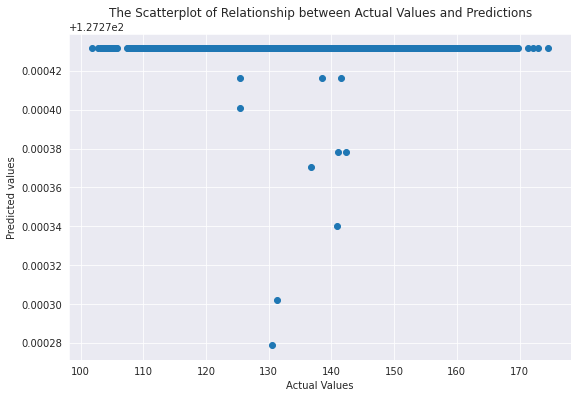

In [117]:
# Visualizing the Relationship between the Actual and Predicted ValuesModel Validation
plt.figure(figsize=(9,6))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

We will evaluate our model performance by calculating the residual sum of squares and the explained variance score

In [118]:
from sklearn import metrics
print("MAE  :",metrics.mean_absolute_error(y_test,y_predict_test))
print("MSE  :",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE  : 14.014548378497995
MSE  : 295.05952183770023
RMSE : 17.177296697609325


In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train) : ',r2_score(y_train, y_predict_train))
print('R2_score (test)  : ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train) :  -0.19423694863435004
R2_score (test)  :  -0.17840158279021723


In [120]:
#Evaluation of the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % -0.0 of the target correctly


<Axes: ylabel='Density'>

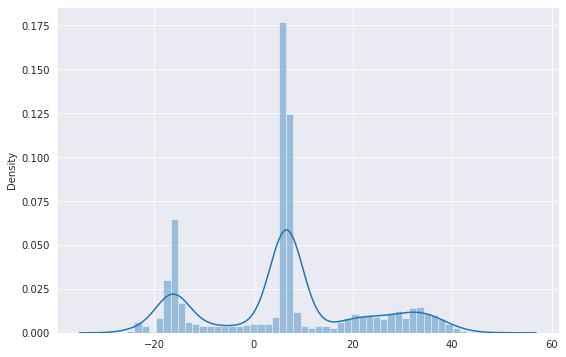

In [121]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)
# Now we will visualize the differences between our predictions and actual y test data


plt.figure(figsize=(9,6))
sns.distplot(y_test-y_predict_test,bins=50) # this figure also proves that our model fits very good

There is no huge differences between our predictions and actual y data

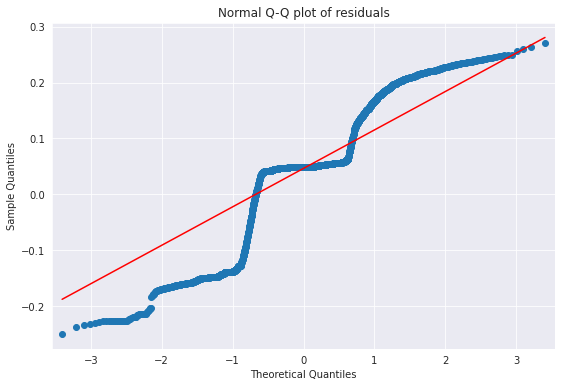

In [122]:
import statsmodels.api as smf
plt.rcParams["figure.figsize"] = (9,6)
smf.qqplot(predictions_df['Error'], line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

error should have Normal / Gaussian distribution~N(0,1) and independently and identically distributed.